# 天池工业AI

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series, DataFrame
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [39]:
import features_process

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## 1. 特征工程

### 1.1 读取数据

In [49]:
#read data
train_df = pd.read_excel('data/train_20180117.xlsx')
test_df = pd.read_excel('data/testA_20180117.xlsx')
print('train shape: ', train_df.shape)

train shape:  (800, 5954)


In [141]:
frames = [train_df, test_df]
data_df = pd.concat(frames, join='outer',ignore_index = True)
data_df = data_df.reindex_axis(train_df.columns, axis=1)
print('data_df:',data_df.shape)

data_df: (1100, 5954)


### 1.2 缺失值

**先获取全是数值变量的特征**

In [142]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 5954 entries, ID to Value
dtypes: float64(5183), int64(759), object(12)
memory usage: 36.3+ MB


In [143]:
float64_col = features_process.obtain_x(train_df,'float64')
int64_col = features_process.obtain_x(train_df,'int64')
object_col = features_process.obtain_x(train_df,'object')
values_col = np.append(int64_col,float64_col)

values_df = train_df[values_col]


**删除缺失值个数超过k=200的特征**

In [144]:
missing_col = features_process.col_missing(values_df, k = 100)
values_df.drop(missing_col,axis=1,inplace=True)
print(values_df.shape)

C:\Program Files\setup\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(800, 5573)


### 1.3 重复列
**删除训练集中数据重复的列**

In [145]:
values_df = features_process.col_deoverlapping(values_df)
print(values_df.shape)

(800, 2762)


In [146]:
values_df.info()
values_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 2762 entries, 210X17 to Value
dtypes: float64(2434), int64(328)
memory usage: 16.9 MB


(800, 2762)

### 1.4 日期列

**获取并删除“日期”特征**

In [147]:
date_cols = features_process.date_cols(values_df)
values_df.drop(date_cols,axis=1,inplace=True)
values_df.shape

(800, 2683)

### 1.5 缺失值填充

**基于中位数填充缺失值**

In [121]:
values_df.to_csv('Bvalues_df.csv')

In [122]:
#显示哪些"列"存在缺失值
#values_df.isnull().any()

In [123]:
values_df.isnull().values.shape

(800, 2683)

In [124]:
#只显示存在缺失值行的数据
values_df[values_df.isnull().values==True]

,210X17,210X19,ERROR:#N/A,210X21,210X31,210X36,210X77,210X80,210X199,210X214,...,750X1305,750X1313,750X1321,750X1329,750X1337,750X1356,750X1364,750X1383,750X1391,Value
0,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.58,37.4,4.46,-12.7,1.66,149.7,49.7,2.814025
0,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.58,37.4,4.46,-12.7,1.66,149.7,49.7,2.814025
0,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.58,37.4,4.46,-12.7,1.66,149.7,49.7,2.814025
0,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.58,37.4,4.46,-12.7,1.66,149.7,49.7,2.814025
0,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.58,37.4,4.46,-12.7,1.66,149.7,49.7,2.814025
2,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.59,37.4,4.46,-12.7,1.66,149.7,49.8,2.725973
2,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.59,37.4,4.46,-12.7,1.66,149.7,49.8,2.725973
2,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.59,37.4,4.46,-12.7,1.66,149.7,49.8,2.725973
2,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.59,37.4,4.46,-12.7,1.66,149.7,49.8,2.725973
2,750,2,0,14,1,435,96,0,1,2,...,2.68,37.4,4.59,37.4,4.46,-12.7,1.66,149.7,49.8,2.725973


In [125]:
values_df = features.fill_nan(values_df)

NameError: name 'features' is not defined

### 1.6 相同值列

**获取相同值的列名，并且删除该列**

In [148]:
uniq_col = features_process.values_uniq(values_df)
values_df.drop(uniq_col,axis=1,inplace=True)
print(values_df.shape)

100%|███████████████████████████████████████████████████████████████████████████| 2683/2683 [00:00<00:00, 11011.76it/s]


(800, 2644)


In [149]:
values_df[col].mode().iloc[0]

2.5095889116158334

In [150]:
count = 0
for col in values_df.columns:
    mode = values_df[col].mode().iloc[0]
    flag = (values_df[col] == int(mode))
    if sum(flag) > 300:
        count += 1
        values_df.drop(col, axis=1, inplace=True)
print(count)
print(values_df.shape)

561
(800, 2083)


In [151]:
values_df.to_csv('train_2083.csv')

### 1.7 特征相关性

**对所有特征计算皮尔逊系数，并且剔除相关系数大于0.95的特征**

In [152]:
#corr 为所有特征的相关系数矩阵
corr = values_df.corr(method='pearson',min_periods=1)

In [153]:
corr_columns = corr.columns
num = corr.shape[0]

for i in range(num):
    for j in range(i, num):
        corr.iloc[i,j:] = 0
        break
corr.to_csv('corr_0.csv')
corr_coef = 0.97
count=0
for i in range(num):
    if abs(corr.iloc[::,i].max())>corr_coef:
        count += 1
        values_df.drop(corr_columns[i], axis=1, inplace=True)
print('剔除相关性系数大于%f的特征个数：%d  '%(corr_coef, count))

剔除相关性系数大于0.970000的特征个数：1015  


In [154]:
values_df.shape

(800, 1068)

In [110]:
values_df.to_csv('train_1068.csv',index=False)

### 1.7 特征-目标值相关性

**对特征和目标值做相关性分析，删除相关性低的特征**

In [160]:
values_decorr = features_process.cal_corrcoef(values_df, corr=0.1)
print(values_decorr.shape)

C:\Users\cmh\Desktop\tianchi1.9\features_process.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  decorr_train['Value'] = y_train


(800, 186)


In [161]:
values_df = values_decorr
values_df.shape

(800, 186)

In [162]:
values_df.to_csv('train_186.csv',index=False)

## 2. 模型 

### 2.1训练、测试数据

**获得训练数据**

In [60]:
values_df = pd.read_csv('Blast_value_df.csv',index_col=0)
values_df.shape

(800, 286)

In [61]:
y_train = values_df['Value'].values
#label = values_df['label'].values
train_col = values_df.columns.tolist()
train_col.remove('Value')
#train_col.remove('label')
x_train = values_df[train_col].values

**获得测试数据**

In [68]:
test_df = pd.read_excel('data/testA_20180117.xlsx')
sub_test = test_df[train_col]
sub_test.fillna(sub_test.median(),inplace=True)
x_test = sub_test.values

C:\Program Files\setup\Anaconda\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### 2.2 数据预处理

**数据归一化**

In [6]:
from sklearn import preprocessing
X = np.vstack((x_train,x_test))
X = preprocessing.scale(X)
x_train = X[0:len(x_train)]
x_test = X[len(x_train):]

C:\Program Files\setup\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [19]:
df=DataFrame(x_train)  

In [132]:
'''
from sklearn import preprocessing 
X = np.vstack((x_train,x_test))
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
x_train = X[0:len(x_train)]
x_test = X[len(x_train):]
'''

'\nfrom sklearn import preprocessing \nX = np.vstack((x_train,x_test))\nmin_max_scaler = preprocessing.MinMaxScaler()\nX = min_max_scaler.fit_transform(X)\nx_train = X[0:len(x_train)]\nx_test = X[len(x_train):]\n'

In [133]:
'''
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(X)
# standardize the data attributes
standardized_X = preprocessing.scale(X)
x_train = X[0:len(x_train)]
x_test = X[len(x_train):]
'''

'\nfrom sklearn import preprocessing\n# normalize the data attributes\nnormalized_X = preprocessing.normalize(X)\n# standardize the data attributes\nstandardized_X = preprocessing.scale(X)\nx_train = X[0:len(x_train)]\nx_test = X[len(x_train):]\n'

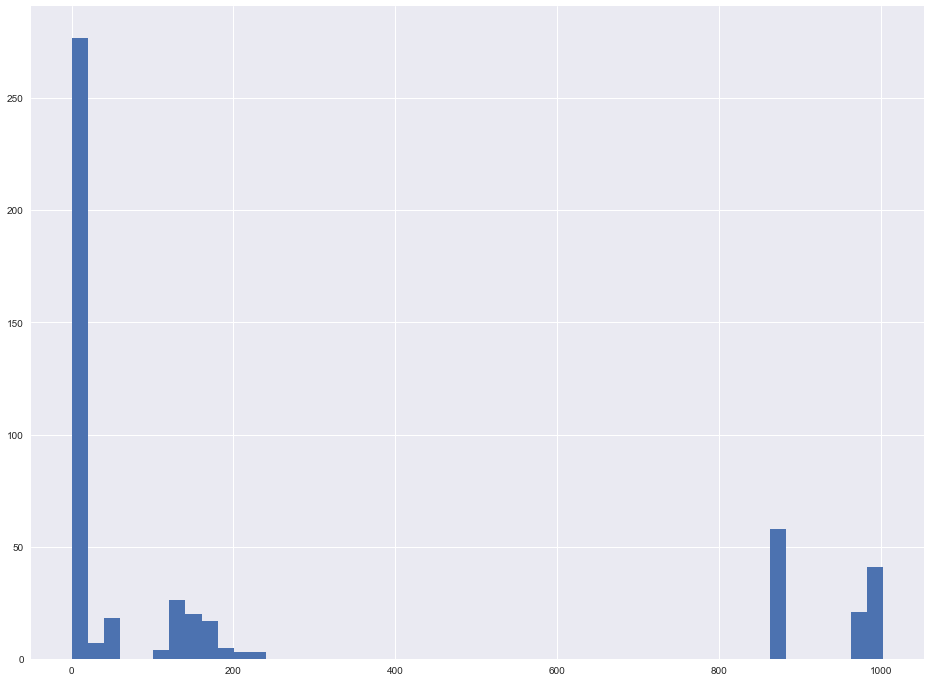

In [17]:
values_df.iloc[::,5].hist(bins=50, figsize=(16,12))

In [ ]:
import seaborn as sns
plt.subplots(figsize=(16,9))
correlation_mat = values_df.corr()
sns.heatmap(correlation_mat, annot=True)

### 2.3 KNN

**KNN回归**

In [7]:
y_train.shape

(500,)

In [7]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn import neighbors  

reg = neighbors.KNeighborsRegressor(n_neighbors=5)
num = list(range(y_train.shape[0]))

loo = LeaveOneOut()
mse = []
for tr, val in loo.split(num):
    reg.fit(x_train[tr], y_train[tr])  
    y_pred = reg.predict(x_train[val])
    mse.append(mean_squared_error(y_pred, y_train[val]))

print("MSE = %f"%(sum(mse)/len(mse)))

MSE = 0.036306


In [8]:
y_pred, y_train[val]

(array([ 2.78416721]), array([ 2.9260329]))

In [9]:
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [10]:
y_pred

array([ 2.61057637,  2.61057637,  2.78894771,  2.94075098,  2.78052814,
        2.88786448,  2.81552779,  2.8412337 ,  2.81750404,  2.80406221,
        2.66015124,  3.07038591,  2.75839412,  2.83517488,  2.975137  ,
        2.84482137,  2.8802378 ,  2.86344715,  2.75681498,  2.68580636,
        2.94457644,  2.70945217,  2.79963005,  2.69560688,  2.70945217,
        2.81483191,  2.74195161,  2.7749339 ,  2.82388249,  2.82272918,
        2.74399672,  2.88253139,  2.68598118,  2.79311981,  2.83738511,
        2.88115034,  2.79471776,  2.79430456,  2.75015952,  2.88426369,
        2.72698779,  2.85541871,  2.76417634,  2.85002832,  2.77368665,
        2.81155259,  2.76748024,  2.74417818,  2.72229157,  2.75601581,
        2.70749017,  2.97467853,  3.00205891,  2.71218007,  2.71473187,
        2.67853694,  2.84399013,  2.8395072 ,  2.81496058,  2.93238491,
        2.93744879,  2.79481604,  2.6638877 ,  2.89430919,  2.64271747,
        2.80119287,  2.87898276,  2.78979973,  2.96594469,  2.71

In [11]:
sub_df = pd.read_csv('subA.csv',header=None)
sub_df['Y'] = y_pred
sub_df.to_csv('test_A4.csv',header=None,index=False)

### 2.4 XGBOOST

In [69]:
import xgboost as xgb
#dtrain = xgb.DMatrix(x_train[0:460,:],label = y_train[:460])
#dtest = xgb.DMatrix(x_test,label = y_test)
#dtest = xgb.DMatrix(x_train[460:,:],label = y_train[460:])
from sklearn import cross_validation

In [70]:
X_train, X_val, y_train, y_val = cross_validation.train_test_split(x_train, y_train, test_size=0.15, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [800, 680]

In [71]:
dtrain = xgb.DMatrix(x_train,label = y_train)
#dtest = xgb.DMatrix(x_test,label = y_test)
#dval = xgb.DMatrix(X_val,label = y_val)
dtest = xgb.DMatrix(x_test,label = y_train[0:100])

In [72]:
# specify parameters via map
param = {'max_depth':2, 'eta':0.1,'learning_rate':0.05, 'silent':1, 'objective':'reg:linear','eval_metric':'rmse' ,'lambda':200,'alpha':2}
#param = {'eta':0.1,'learning_rate':0.05, 'silent':1,'booster':'gbliner', 'objective':'reg:linear','eval_metric':'rmse' ,'lambda':2,'alpha':2}

# 设置boosting迭代计算次数
num_round = 100

In [ ]:
from sklearn.metrics import mean_squared_error
bst = xgb.train(param, dtrain, num_round) 
val_pred = bst.predict(dtest)
train_pred = bst.predict(dtrain)
train_mse=(mean_squared_error(train_pred, y_train))
validation_mse=(mean_squared_error(val_pred, y_train[0:100]))
print("train_MSE = %f"%train_mse)
print("validation_MSE = %f"%validation_mse)

In [28]:
sub_df = pd.read_csv('subA.csv',header=None)
sub_df['Y'] = val_pred
sub_df.to_csv('test_A5.csv',header=None,index=False)

In [68]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import ShuffleSplit

xgb_model = xgb.XGBRegressor()
parameters = {'objective':['reg:linear'],
              'learning_rate': [0.05],
              'max_depth': [5,6],
              'min_child_weight':[11],
             'silent':[1],
             'n_estimators':[5]}

In [70]:
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
clf = GridSearchCV(xgb_model, param_grid=parameters,
                  cv=cv_sets,
                  scoring='neg_mean_squared_error',
                  verbose=2, refit=True)
clf.fit(x_train, y_train)

TypeError: object of type 'ShuffleSplit' has no len()

In [1]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
num = list(range(y_train.shape[0]))
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x_train, y_train)
loo = LeaveOneOut()
mse = []
for tr, val in loo.split(num):
    dtrain = xgb.DMatrix(x_train[tr],label = y_train[tr])
    #dtest = xgb.DMatrix(x_test,label = y_test)
    dval = xgb.DMatrix(x_train[val],label = y_train[val])
    bst = xgb.train(param, dtrain, num_round) 
    val_pred = bst.predict(dval)
    mse.append(mean_squared_error(val_pred, y_train[val]))
    print(val)
print("MSE = %f"%(sum(mse)/len(mse)))

NameError: name 'y_train' is not defined

In [50]:
y_pred, y_train[val]

(array([ 2.61057637,  2.61057637,  2.78894771,  2.94075098,  2.78052814,
         2.88786448,  2.81552779,  2.8412337 ,  2.81750404,  2.80406221,
         2.66015124,  3.07038591,  2.75839412,  2.83517488,  2.975137  ,
         2.84482137,  2.8802378 ,  2.86344715,  2.75681498,  2.68580636,
         2.94457644,  2.70945217,  2.79963005,  2.69560688,  2.70945217,
         2.81483191,  2.74195161,  2.7749339 ,  2.82388249,  2.82272918,
         2.74399672,  2.88253139,  2.68598118,  2.79311981,  2.83738511,
         2.88115034,  2.79471776,  2.79430456,  2.75015952,  2.88426369,
         2.72698779,  2.85541871,  2.76417634,  2.85002832,  2.77368665,
         2.81155259,  2.76748024,  2.74417818,  2.72229157,  2.75601581,
         2.70749017,  2.97467853,  3.00205891,  2.71218007,  2.71473187,
         2.67853694,  2.84399013,  2.8395072 ,  2.81496058,  2.93238491,
         2.93744879,  2.79481604,  2.6638877 ,  2.89430919,  2.64271747,
         2.80119287,  2.87898276,  2.78979973,  2.9

In [224]:
train_pred = bst.predict(dtrain)
#train_predictions = [round(value) for value in train_preds]
y_train1 = dtrain.get_label()
#train_accuracy = accuracy_score(y_train, train_predictions)
#print ("Train Accuary: %.2f%%" % (train_accuracy * 100.0))
mse = 1/500 * np.sum(np.square(y_train1-train_pred))
print(mse)

0.0133584718704


In [225]:
y_test

array([ 2.77278913,  2.782469  ,  3.31040605,  2.84601751,  2.95788437,
        3.22707774,  2.65260576,  2.93532712,  2.88298069,  2.74874291,
        2.87732058,  2.78536975,  2.64594474,  2.80316417,  2.56330528,
        3.12929649,  2.75976702,  3.06259109,  2.83297147,  2.93598543,
        2.89830038,  3.02749429,  2.91570109,  3.11237871,  2.64958246,
        2.60694199,  2.85853727,  2.6319409 ,  3.02939638,  2.84612516,
        3.02446789,  3.05155672,  3.05495253,  2.93741112,  2.88116379,
        2.88574334,  2.62334152,  3.0151373 ,  2.75328635,  2.9260329 ])

In [226]:
# make prediction
y_test = y_train[460:]
test_preds = bst.predict(dtest)
mse_test = 1/(y_test.shape[0]) * np.sum(np.square(y_test-test_preds))
print(mse_test)

0.0382936394885


In [215]:
y_test

array([ 2.77278913,  2.782469  ,  3.31040605,  2.84601751,  2.95788437,
        3.22707774,  2.65260576,  2.93532712,  2.88298069,  2.74874291,
        2.87732058,  2.78536975,  2.64594474,  2.80316417,  2.56330528,
        3.12929649,  2.75976702,  3.06259109,  2.83297147,  2.93598543,
        2.89830038,  3.02749429,  2.91570109,  3.11237871,  2.64958246,
        2.60694199,  2.85853727,  2.6319409 ,  3.02939638,  2.84612516,
        3.02446789,  3.05155672,  3.05495253,  2.93741112,  2.88116379,
        2.88574334,  2.62334152,  3.0151373 ,  2.75328635,  2.9260329 ])

In [65]:
test_preds

NameError: name 'test_preds' is not defined

In [64]:
sub_df = pd.read_csv('subA.csv',header=None)
sub_df['Y'] = test_preds
sub_df.to_csv('test_A3.csv',header=None,index=False)

NameError: name 'test_preds' is not defined

**特征重要度排序**

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

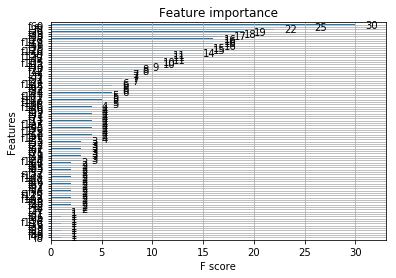

[ 0.04066543  0.00184843  0.02033272  0.          0.          0.012939
  0.00369686  0.012939    0.00184843  0.04621072  0.03142329  0.00739372
  0.00924214  0.02033272  0.01109057  0.02772643  0.02957486  0.00369686
  0.00739372  0.00554529  0.00554529  0.00554529  0.00554529  0.02957486
  0.012939    0.          0.00184843  0.01478743  0.00369686  0.00739372
  0.03512015  0.          0.00739372  0.01848429  0.00369686  0.00739372
  0.          0.00554529  0.00184843  0.          0.          0.
  0.00369686  0.00369686  0.          0.01109057  0.00369686  0.00369686
  0.00184843  0.          0.          0.          0.00554529  0.          0.
  0.00369686  0.          0.00369686  0.          0.025878    0.05545286
  0.00184843  0.00554529  0.00369686  0.00739372  0.00369686  0.
  0.00369686  0.00369686  0.00739372  0.01663586  0.00739372  0.01478743
  0.00739372  0.          0.00554529  0.00184843  0.          0.          0.
  0.          0.          0.          0.03327172  0.01109057 

In [180]:
from xgboost import plot_importance
import matplotlib.pyplot as pyplot
from xgboost import XGBRegressor
from sklearn import metrics
model_XGB=XGBRegressor()
model_XGB.fit(x_train,y_train)
plot_importance(model_XGB)
pyplot.show()
pyplot.savefig('D:\\feture_importance.svg',format='svg')
print(model_XGB.feature_importances_)

### 2.4 结果导出到文件

In [136]:
sub_df = pd.read_csv('subA.csv',header=None)
sub_df['Y3'] = y_pred
sub_df.to_csv('github1.csv',header=None,index=False)

In [106]:
answer.shape

(100,)

In [110]:
sub = []
for i in range(100):
    if answer[i] == 1:
        sub.append (2.50)
    elif answer[i] == 2:
        sub.append(2.62)
    elif answer[i] == 3:
        sub.append(2.7)
    elif answer[i] == 4:
        sub.append(2.75)
    elif answer[i] == 5:
        sub.append(2.80)
    elif answer[i] == 6:
        sub.append(2.85)
    elif answer[i] == 7:
        sub.append(2.90)
    elif answer[i] == 8:
        sub.append(2.96)
    elif answer[i] == 9:
        sub.append(3.06)
    elif answer[i] == 10:
        sub.append(3.16)